In [57]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [58]:
%autoreload 2

In [59]:
import re, gc, os, stat
import pandas as pd
import numpy as np
from datetime import timedelta
from datetime import datetime as dt
import plotly.graph_objects as go

os.chdir('/eos/user/m/mdtoffline/mdt_dcs_offline/streamlit/mdt-dcs-viewer')

from functions import *

# setup pbeast python API

from beauty import Beauty
import libpbeastpy

db = libpbeastpy.ServerProxy('http://pc-tbed-bst-prod:8080')
beauty = Beauty('http://pc-tbed-bst-prod:8080')

pd.options.mode.chained_assignment = None  # default='warn'

In [60]:
run_num = 484616

In [61]:
rn_df = beauty.timeseries(dt(2024,4,1,0,0), 
                          dt.now(), 
                          'DCS', 
                          'ATLAS_PVSSDCS', 
                          'value-number', 
                          'ATLGCSDDC:daqRunNumber.value', 
                          None, 
                          False)[0]

rn_df = pd.DataFrame({'value': rn_df.array , 'dt': rn_df.index})
rn_df['dt'] = pd.to_datetime(rn_df['dt'])
rn_df['value'] = rn_df['value'].astype(float).astype(int)
rn_df

value                               dt
0     472017 2024-03-31 17:24:49.911000+02:00
1     472017 2024-04-01 06:03:26.548001+02:00
2     472056 2024-04-01 06:09:05.710000+02:00
3     472056 2024-04-01 18:32:43.958001+02:00
4     472095 2024-04-01 18:40:04.192000+02:00
...      ...                              ...
1749  490490 2024-11-26 11:13:29.899001+01:00
1750  490497 2024-11-26 11:18:09.271000+01:00
1751  490497 2024-11-26 13:31:30.396001+01:00
1752  490516 2024-11-26 13:36:23.743000+01:00
1753  490516 2024-11-26 14:05:53.624001+01:00

[1754 rows x 2 columns]

In [62]:
for i in rn_df['value'].unique():
    
    if rn_df[rn_df['value'] == i].shape[0] != 2:

        rn_df.drop(rn_df[rn_df['value'] == i].index[0], inplace = True)

rn_df

value                               dt
0     472017 2024-03-31 17:24:49.911000+02:00
1     472017 2024-04-01 06:03:26.548001+02:00
2     472056 2024-04-01 06:09:05.710000+02:00
3     472056 2024-04-01 18:32:43.958001+02:00
4     472095 2024-04-01 18:40:04.192000+02:00
...      ...                              ...
1749  490490 2024-11-26 11:13:29.899001+01:00
1750  490497 2024-11-26 11:18:09.271000+01:00
1751  490497 2024-11-26 13:31:30.396001+01:00
1752  490516 2024-11-26 13:36:23.743000+01:00
1753  490516 2024-11-26 14:05:53.624001+01:00

[1684 rows x 2 columns]

In [63]:
total_runs = int(rn_df.shape[0]/2)

In [64]:
sb_df = beauty.timeseries(dt(2024,4,1,0,0), 
                           dt.now(), 
                           'DCS', 
                           'ATLAS_PVSSDCS', 
                           'value-number', 
                           'ATLGCSLHC:bit_lhc_RunCtrl_SafeBeam_StableBeams.value', 
                           None, 
                           False)[0]

sb_df = pd.DataFrame({'value': sb_df.array , 'dt': sb_df.index})
sb_df['dt'] = pd.to_datetime(sb_df['dt'])
sb_df['value'] = sb_df['value'].astype(float).astype(int)
sb_df

value                               dt
0        1 2024-04-01 09:17:44.416000+02:00
1        0 2024-04-01 15:28:30.552000+02:00
2        1 2024-04-05 18:25:34.679000+02:00
3        0 2024-04-05 23:59:04.802000+02:00
4        1 2024-04-06 02:23:52.855000+02:00
..     ...                              ...
612      0 2024-11-22 10:45:51.245000+01:00
613      1 2024-11-22 13:55:00.316000+01:00
614      0 2024-11-22 17:26:49.398000+01:00
615      1 2024-11-23 03:13:33.614000+01:00
616      0 2024-11-23 06:37:58.690000+01:00

[617 rows x 2 columns]

In [65]:
run_nums = []
run_start_tss = []
run_end_tss = []
sb_start_tss = []
sb_end_tss = []

for tmp_run_num in rn_df['value'].unique():

    tmp_rn_df = rn_df[rn_df['value'] == tmp_run_num]
    
    tmp_run_start_dt = tmp_rn_df.iloc[0]['dt']
    tmp_run_end_dt = tmp_rn_df.iloc[1]['dt']

    tmp_sb_df = sb_df[(sb_df['dt'] > tmp_run_start_dt) & (sb_df['dt'] < tmp_run_end_dt)]

    if len(tmp_sb_df) == 2:

        tmp_sb_start_dt = tmp_sb_df.iloc[0]['dt']
        tmp_sb_end_dt = tmp_sb_df.iloc[1]['dt']
        
        run_nums.append(tmp_run_num)
        run_start_tss.append(tmp_run_start_dt)
        run_end_tss.append(tmp_run_end_dt)
        sb_start_tss.append(tmp_sb_start_dt)
        sb_end_tss.append(tmp_sb_end_dt)

In [66]:
dic_tmp = {'Run Number' : run_nums, 
           'Run Start dt' : run_start_tss, 
           'Run End dt' : run_end_tss,
           'Stable Beam Start dt' : sb_start_tss,
           'Stable Beam End dt' : sb_end_tss
          }

rn_sb_df = pd.DataFrame(dic_tmp)
rn_sb_df = rn_sb_df.iloc[::-1].reset_index(drop=True)

rn_sb_df

Run Number                     Run Start dt  \
0        490223 2024-11-23 01:12:14.146000+01:00   
1        490182 2024-11-22 11:52:09.489000+01:00   
2        490085 2024-11-21 00:41:40.655000+01:00   
3        489961 2024-11-19 23:27:52.540000+01:00   
4        489938 2024-11-19 19:04:37.597000+01:00   
..          ...                              ...   
280      472662 2024-04-07 10:37:52.520000+02:00   
281      472604 2024-04-06 08:46:48.535000+02:00   
282      472578 2024-04-06 01:12:43.331000+02:00   
283      472553 2024-04-05 16:25:05.967000+02:00   
284      472056 2024-04-01 06:09:05.710000+02:00   

                          Run End dt             Stable Beam Start dt  \
0   2024-11-23 19:06:42.440001+01:00 2024-11-23 03:13:33.614000+01:00   
1   2024-11-22 19:45:54.889001+01:00 2024-11-22 13:55:00.316000+01:00   
2   2024-11-21 10:45:33.442001+01:00 2024-11-21 02:33:01.523000+01:00   
3   2024-11-20 08:36:54.382001+01:00 2024-11-20 00:45:10.943000+01:00   
4   2024-11-19 23:20:52.472001+01:00 2024-11-19 21:30:07.870000+01:00   
..                               ...                              ...   
280 2024-04-07 22:01:54.309001+02:00 2024-04-07 11:33:36.596000+02:00   
281 2024-04-06 20:37:33.270001+02:00 2024-04-06 10:00:23.024000+02:00   
282 2024-04-06 08:26:48.183001+02:00 2024-04-06 02:23:52.855000+02:00   
283 2024-04-06 01:06:56.492001+02:00 2024-04-05 18:25:34.679000+02:00   
284 2024-04-01 18:32:43.958001+02:00 2024-04-01 09:17:44.416000+02:00   

                  Stable Beam End dt  
0   2024-11-23 06:37:58.690000+01:00  
1   2024-11-22 17:26:49.398000+01:00  
2   2024-11-21 09:50:45.687000+01:00  
3   2024-11-20 04:40:03.032000+01:00  
4   2024-11-19 22:01:06.881000+01:00  
..                               ...  
280 2024-04-07 19:07:23.761000+02:00  
281 2024-04-06 17:11:43.183000+02:00  
282 2024-04-06 07:25:39.966000+02:00  
283 2024-04-05 23:59:04.802000+02:00  
284 2024-04-01 15:28:30.552000+02:00  

[285 rows x 5 columns]

In [67]:
percentage_of_stable_beam_runs = round(len(rn_sb_df) / total_runs * 100, 2)
print(f"\nPercentage of stable beam runs: {percentage_of_stable_beam_runs}%\n")


Percentage of stable beam runs: 33.85%



In [68]:
run_df = rn_sb_df[rn_sb_df['Run Number'] == run_num]
run_df

Run Number                     Run Start dt  \
87      484616 2024-09-15 17:55:54.502000+02:00   

                         Run End dt             Stable Beam Start dt  \
87 2024-09-16 10:04:02.472001+02:00 2024-09-15 18:42:00.781000+02:00   

                 Stable Beam End dt  
87 2024-09-16 09:09:23.105000+02:00

In [69]:
since_dt = run_df.iloc[0]['Run Start dt']
till_dt = run_df.iloc[0]['Run End dt']
sb_start_dt = run_df.iloc[0]['Stable Beam Start dt']
sb_end_dt = run_df.iloc[0]['Stable Beam End dt']

In [70]:
total_run_time = till_dt - since_dt
total_run_time

Timedelta('0 days 16:08:07.970001')

In [71]:
lbn_df = beauty.timeseries(since_dt.tz_convert(None) + timedelta(hours = 2), 
                            till_dt.tz_convert(None) + timedelta(hours = 2), 
                            'DCS', 
                            'ATLAS_PVSSDCS', 
                            'value-number', 
                            'ATLGCSDDC:daqLumiBlockNumber.value', 
                            None, 
                            False)[0]

lbn_df = pd.DataFrame({'value': lbn_df.array , 'dt': lbn_df.index})
lbn_df['dt'] = pd.to_datetime(lbn_df['dt'])
lbn_df['value'] = lbn_df['value'].astype(float).astype(int)
lbn_df = lbn_df[(lbn_df['dt'] > since_dt) & (lbn_df['dt'] < till_dt)].reset_index(drop = True)
lbn_df

value                               dt
0         0 2024-09-15 17:55:54.594000+02:00
1         1 2024-09-15 17:56:56.395000+02:00
2         2 2024-09-15 17:57:23.240000+02:00
3         3 2024-09-15 17:57:47.979000+02:00
4         4 2024-09-15 17:58:48.288000+02:00
...     ...                              ...
1175   1175 2024-09-16 09:09:15.552000+02:00
1176   1176 2024-09-16 09:10:15.548000+02:00
1177   1177 2024-09-16 09:11:15.651000+02:00
1178   1178 2024-09-16 09:12:15.653000+02:00
1179   1179 2024-09-16 09:13:15.754000+02:00

[1180 rows x 2 columns]

In [72]:
while lbn_df.iloc[-1]['value'] == lbn_df.iloc[-2]['value']:

    lbn_df.drop(index = len(lbn_df) - 1, inplace = True)
    
lbn_df

value                               dt
0         0 2024-09-15 17:55:54.594000+02:00
1         1 2024-09-15 17:56:56.395000+02:00
2         2 2024-09-15 17:57:23.240000+02:00
3         3 2024-09-15 17:57:47.979000+02:00
4         4 2024-09-15 17:58:48.288000+02:00
...     ...                              ...
1175   1175 2024-09-16 09:09:15.552000+02:00
1176   1176 2024-09-16 09:10:15.548000+02:00
1177   1177 2024-09-16 09:11:15.651000+02:00
1178   1178 2024-09-16 09:12:15.653000+02:00
1179   1179 2024-09-16 09:13:15.754000+02:00

[1180 rows x 2 columns]

In [73]:
lbn_df.insert(1, 'Stable Beam', 0)

mask = ((lbn_df['dt'] > run_df.iloc[0]['Stable Beam Start dt']) & (lbn_df['dt'] < run_df.iloc[0]['Stable Beam End dt']))
lbn_df.loc[mask, 'Stable Beam'] = 1

lbn_df.rename(columns = {'value' : 'Lumiblock Number'}, inplace = True)
lbn_df

Lumiblock Number  Stable Beam                               dt
0                    0            0 2024-09-15 17:55:54.594000+02:00
1                    1            0 2024-09-15 17:56:56.395000+02:00
2                    2            0 2024-09-15 17:57:23.240000+02:00
3                    3            0 2024-09-15 17:57:47.979000+02:00
4                    4            0 2024-09-15 17:58:48.288000+02:00
...                ...          ...                              ...
1175              1175            1 2024-09-16 09:09:15.552000+02:00
1176              1176            0 2024-09-16 09:10:15.548000+02:00
1177              1177            0 2024-09-16 09:11:15.651000+02:00
1178              1178            0 2024-09-16 09:12:15.653000+02:00
1179              1179            0 2024-09-16 09:13:15.754000+02:00

[1180 rows x 3 columns]

In [74]:
tmp_df = lbn_df[lbn_df['Stable Beam'] == 1]

sb_lb_start = tmp_df.iloc[0]['Lumiblock Number']
sb_lb_end = tmp_df.iloc[-1]['Lumiblock Number']

print(sb_lb_start)
print(sb_lb_end)

62
1175


In [75]:
def to_ts(dt):

    return int(int(dt.asm8) / 10**3)

In [76]:
query = '.*_JTAG.*fsm.currentState|.*_ML1.fsm.currentState|.*_ML2.fsm.currentState|.*_LV.fsm.currentState'

fsm_df = query_lib_data(to_ts(since_dt), 
                        to_ts(till_dt), 
                        query, 
                        'MDT', 
                        'string')

fsm_df = fsm_df[(fsm_df['dt'] > sb_start_dt) & (fsm_df['dt'] < sb_end_dt)].reset_index(drop = True)

fsm_df['value'] = fsm_df['value'].str.replace("'",'')

In [77]:
fsm_df[fsm_df['datapoint'].str.contains('EOS3C02')]

datapoint                ts  \
2130  ATLMDTPS3:MDTPS_EC_OUTER|EOS3C02_ML2.fsm.curre...  1726418535887000   
2131  ATLMDTPS3:MDTPS_EC_OUTER|EOS3C02_ML1.fsm.curre...  1726418535887000   
2400  ATLMDTPS3:MDTPS_EC_OUTER|EOS3C02_ML1.fsm.curre...  1726418537527000   
2414  ATLMDTPS3:MDTPS_EC_OUTER|EOS3C02_ML2.fsm.curre...  1726418537527000   
2997  ATLMDTPS3:MDTPS_EC_OUTER|EOS3C02_ML2.fsm.curre...  1726418574085000   
3001  ATLMDTPS3:MDTPS_EC_OUTER|EOS3C02_ML1.fsm.curre...  1726418574085000   
3641  ATLMDTMDM5:MDT_ECC_JTAG_OUTER|EOS3C02.fsm.curr...  1726437919279000   
3661  ATLMDTMDM5:MDT_ECC_JTAG_OUTER|EOS3C02.fsm.curr...  1726437931713000   
3662  ATLMDTMDM5:MDT_ECC_JTAG_OUTER|EOS3C02.fsm.curr...  1726437931722000   
3663  ATLMDTMDM5:MDT_ECC_JTAG_OUTER|EOS3C02.fsm.curr...  1726437934028000   
3664  ATLMDTMDM5:MDT_ECC_JTAG_OUTER|EOS3C02.fsm.curr...  1726437936034000   
3665  ATLMDTMDM5:MDT_ECC_JTAG_OUTER|EOS3C02.fsm.curr...  1726437937163000   
3666  ATLMDTMDM5:MDT_ECC_JTAG_OUTER|EOS3C02.fsm.curr...  1726437937367000   
3667  ATLMDTMDM5:MDT_ECC_JTAG_OUTER|EOS3C02.fsm.curr...  1726437937368000   
3668  ATLMDTMDM5:MDT_ECC_JTAG_OUTER|EOS3C02.fsm.curr...  1726437937368001   
3669  ATLMDTMDM5:MDT_ECC_JTAG_OUTER|EOS3C02.fsm.curr...  1726437939269000   
3670  ATLMDTMDM5:MDT_ECC_JTAG_OUTER|EOS3C02.fsm.curr...  1726437941274000   
3671  ATLMDTMDM5:MDT_ECC_JTAG_OUTER|EOS3C02.fsm.curr...  1726437942204000   

            value                               dt  
2130           ON 2024-09-15 18:42:15.887000+02:00  
2131           ON 2024-09-15 18:42:15.887000+02:00  
2400      RAMP_UP 2024-09-15 18:42:17.527000+02:00  
2414      RAMP_UP 2024-09-15 18:42:17.527000+02:00  
2997           ON 2024-09-15 18:42:54.085000+02:00  
3001           ON 2024-09-15 18:42:54.085000+02:00  
3641      REQUEST 2024-09-16 00:05:19.279000+02:00  
3661      PRELOAD 2024-09-16 00:05:31.713000+02:00  
3662        RESET 2024-09-16 00:05:31.722000+02:00  
3663   STRINGLOAD 2024-09-16 00:05:34.028000+02:00  
3664       VERIFY 2024-09-16 00:05:36.034000+02:00  
3665       FAILED 2024-09-16 00:05:37.163000+02:00  
3666      REQUEST 2024-09-16 00:05:37.367000+02:00  
3667      PRELOAD 2024-09-16 00:05:37.368000+02:00  
3668        RESET 2024-09-16 00:05:37.368001+02:00  
3669   STRINGLOAD 2024-09-16 00:05:39.269000+02:00  
3670       VERIFY 2024-09-16 00:05:41.274000+02:00  
3671  INITIALIZED 2024-09-16 00:05:42.204000+02:00

In [78]:
good_flags = ['OFF', 
              'ON', 
              'STANDBY', 
              'INITIALIZED', 
              'RAMP_UP', 
              'RAMPING', 
              'RAMP_DOWN', 
              'REQUEST', 
              'PRELOAD', 
              'VERIFY', 
              'RESET', 
              'STRINGLOAD', 
              'READY']

fsm_flags_df  = fsm_df[~(fsm_df['value'].isin(good_flags))]

fsm_flags_df['dt'] = pd.to_datetime(fsm_df['dt'])
fsm_flags_df.drop(columns = 'ts', inplace = True)

fsm_flags_df.head()

datapoint            value  \
3665  ATLMDTMDM5:MDT_ECC_JTAG_OUTER|EOS3C02.fsm.curr...           FAILED   
3774  ATLMDTMDM4:MDT_ECA_JTAG_OUTER|EOL5A01.fsm.curr...  NOT_INITIALIZED   
3775  ATLMDTMDM4:MDT_ECA_JTAG_OUTER|EOL3A03.fsm.curr...  NOT_INITIALIZED   
3776  ATLMDTMDM4:MDT_ECA_JTAG_OUTER|EOS3A04.fsm.curr...  NOT_INITIALIZED   
3777  ATLMDTMDM4:MDT_ECA_JTAG_OUTER|EOS6A04.fsm.curr...  NOT_INITIALIZED   

                                   dt  
3665 2024-09-16 00:05:37.163000+02:00  
3774 2024-09-16 05:24:01.885000+02:00  
3775 2024-09-16 05:24:01.885000+02:00  
3776 2024-09-16 05:24:01.885000+02:00  
3777 2024-09-16 05:24:01.885000+02:00

In [79]:
fsm_flags_df['chamber_name'] = fsm_flags_df['datapoint'].apply(lambda x : ''.join(list(x.split('|')[1][:7])))

In [80]:
fsm_flags_df.head()

datapoint            value  \
3665  ATLMDTMDM5:MDT_ECC_JTAG_OUTER|EOS3C02.fsm.curr...           FAILED   
3774  ATLMDTMDM4:MDT_ECA_JTAG_OUTER|EOL5A01.fsm.curr...  NOT_INITIALIZED   
3775  ATLMDTMDM4:MDT_ECA_JTAG_OUTER|EOL3A03.fsm.curr...  NOT_INITIALIZED   
3776  ATLMDTMDM4:MDT_ECA_JTAG_OUTER|EOS3A04.fsm.curr...  NOT_INITIALIZED   
3777  ATLMDTMDM4:MDT_ECA_JTAG_OUTER|EOS6A04.fsm.curr...  NOT_INITIALIZED   

                                   dt chamber_name  
3665 2024-09-16 00:05:37.163000+02:00      EOS3C02  
3774 2024-09-16 05:24:01.885000+02:00      EOL5A01  
3775 2024-09-16 05:24:01.885000+02:00      EOL3A03  
3776 2024-09-16 05:24:01.885000+02:00      EOS3A04  
3777 2024-09-16 05:24:01.885000+02:00      EOS6A04

In [81]:
fsm_lbns = []

for i in range(len(fsm_flags_df)):

    tmp = lbn_df[lbn_df['dt'] < fsm_flags_df.iloc[i]['dt']].iloc[-1]['Lumiblock Number']

    fsm_lbns.append(tmp)

In [82]:
fsm_flags_df.insert(0, 'Lumiblock Number', fsm_lbns)

In [83]:
fsm_flags_df.head()

Lumiblock Number                                          datapoint  \
3665               515  ATLMDTMDM5:MDT_ECC_JTAG_OUTER|EOS3C02.fsm.curr...   
3774               877  ATLMDTMDM4:MDT_ECA_JTAG_OUTER|EOL5A01.fsm.curr...   
3775               877  ATLMDTMDM4:MDT_ECA_JTAG_OUTER|EOL3A03.fsm.curr...   
3776               877  ATLMDTMDM4:MDT_ECA_JTAG_OUTER|EOS3A04.fsm.curr...   
3777               877  ATLMDTMDM4:MDT_ECA_JTAG_OUTER|EOS6A04.fsm.curr...   

                value                               dt chamber_name  
3665           FAILED 2024-09-16 00:05:37.163000+02:00      EOS3C02  
3774  NOT_INITIALIZED 2024-09-16 05:24:01.885000+02:00      EOL5A01  
3775  NOT_INITIALIZED 2024-09-16 05:24:01.885000+02:00      EOL3A03  
3776  NOT_INITIALIZED 2024-09-16 05:24:01.885000+02:00      EOS3A04  
3777  NOT_INITIALIZED 2024-09-16 05:24:01.885000+02:00      EOS6A04

In [84]:
fsm_flags_df['Info'] = ''

for fsm_type in ['JTAG', 'ML1|ML2', 'LV']:

    if fsm_type == 'ML1|ML2':

        tmp_str = 'HV'

    else:

        tmp_str = fsm_type

    mask = fsm_flags_df['datapoint'].str.contains(fsm_type)
    fsm_flags_df.loc[mask, 'Info'] = tmp_str

In [85]:
fsm_flags_df.head()

Lumiblock Number                                          datapoint  \
3665               515  ATLMDTMDM5:MDT_ECC_JTAG_OUTER|EOS3C02.fsm.curr...   
3774               877  ATLMDTMDM4:MDT_ECA_JTAG_OUTER|EOL5A01.fsm.curr...   
3775               877  ATLMDTMDM4:MDT_ECA_JTAG_OUTER|EOL3A03.fsm.curr...   
3776               877  ATLMDTMDM4:MDT_ECA_JTAG_OUTER|EOS3A04.fsm.curr...   
3777               877  ATLMDTMDM4:MDT_ECA_JTAG_OUTER|EOS6A04.fsm.curr...   

                value                               dt chamber_name  Info  
3665           FAILED 2024-09-16 00:05:37.163000+02:00      EOS3C02  JTAG  
3774  NOT_INITIALIZED 2024-09-16 05:24:01.885000+02:00      EOL5A01  JTAG  
3775  NOT_INITIALIZED 2024-09-16 05:24:01.885000+02:00      EOL3A03  JTAG  
3776  NOT_INITIALIZED 2024-09-16 05:24:01.885000+02:00      EOS3A04  JTAG  
3777  NOT_INITIALIZED 2024-09-16 05:24:01.885000+02:00      EOS6A04  JTAG

In [86]:
len(fsm_flags_df)

49

In [87]:
fsm_flags_df.insert(5, 'Re-Initialized', 'No')

In [88]:
unique_chamber_errors = (fsm_flags_df['chamber_name'] + ' ' + fsm_flags_df['Info']).unique()

for chamber_error in unique_chamber_errors:

    chamber = chamber_error.split(' ')[0]
    error = chamber_error.split(' ')[1]
    
    tmp_df = fsm_df[(fsm_df['datapoint'].str.contains(chamber)) & (fsm_df['datapoint'].str.contains(error))]

    if tmp_df.iloc[-1]['value'] == 'INITIALIZED':

        mask = ((fsm_flags_df['chamber_name'].str.contains(chamber)) & (fsm_flags_df['Info'].str.contains(error)))
        fsm_flags_df.loc[mask, 'Re-Initialized'] = 'Yes'


In [89]:
fsm_flags_df.head()

Lumiblock Number                                          datapoint  \
3665               515  ATLMDTMDM5:MDT_ECC_JTAG_OUTER|EOS3C02.fsm.curr...   
3774               877  ATLMDTMDM4:MDT_ECA_JTAG_OUTER|EOL5A01.fsm.curr...   
3775               877  ATLMDTMDM4:MDT_ECA_JTAG_OUTER|EOL3A03.fsm.curr...   
3776               877  ATLMDTMDM4:MDT_ECA_JTAG_OUTER|EOS3A04.fsm.curr...   
3777               877  ATLMDTMDM4:MDT_ECA_JTAG_OUTER|EOS6A04.fsm.curr...   

                value                               dt chamber_name  \
3665           FAILED 2024-09-16 00:05:37.163000+02:00      EOS3C02   
3774  NOT_INITIALIZED 2024-09-16 05:24:01.885000+02:00      EOL5A01   
3775  NOT_INITIALIZED 2024-09-16 05:24:01.885000+02:00      EOL3A03   
3776  NOT_INITIALIZED 2024-09-16 05:24:01.885000+02:00      EOS3A04   
3777  NOT_INITIALIZED 2024-09-16 05:24:01.885000+02:00      EOS6A04   

     Re-Initialized  Info  
3665            Yes  JTAG  
3774            Yes  JTAG  
3775            Yes  JTAG  
3776            Yes  JTAG  
3777            Yes  JTAG

In [90]:
len(fsm_flags_df)

49

In [91]:
sb_range = list(range(sb_lb_start, sb_lb_end))

In [92]:
fsm_percentage = {'JTAG' : [], 'HV' : [], 'LV' : []}

for fsm_type in ['JTAG', 'HV', 'LV']:

    tmp_df = fsm_flags_df[fsm_flags_df['Info'] == fsm_type]

    fsm_lbns = tmp_df['Lumiblock Number'].unique()
    number_of_chambers = 1112
    
    j = 0
    
    number_of_errors = 0
    
    for i in sb_range:
    
        if i in fsm_lbns:
        
            number_of_errors = tmp_df[tmp_df['Lumiblock Number'] == i].shape[0]
    
            fsm_lb_percentage = (number_of_chambers - number_of_errors) / number_of_chambers * 100
    
            fsm_percentage[fsm_type].append(fsm_lb_percentage)
    
            j += 1
    
        else:
    
            fsm_percentage[fsm_type].append(100.0)

In [93]:
percentages = [(sb_range, fsm_percentage['JTAG'], 'JTAG DQ Percentage'), 
               (sb_range, fsm_percentage['HV'], 'HV DQ Percentage'), 
               (sb_range, fsm_percentage['LV'], 'LV DQ Percentage')]

In [94]:
lumi_df = query_lib_data(to_ts(since_dt), to_ts(till_dt), 'ATLGCSLUMI:ATLAS_PREFERRED_LBAv_PHYS_CalibLumi.value')
lumi_df['value'] = lumi_df['value'].astype('float64')
lumi_df = lumi_df[(lumi_df['dt'] > since_dt) & (lumi_df['dt'] < till_dt)].reset_index(drop = True)

In [95]:
lumi_df

datapoint                ts  \
0    ATLGCSLUMI:ATLAS_PREFERRED_LBAv_PHYS_CalibLumi...  1726415848516000   
1    ATLGCSLUMI:ATLAS_PREFERRED_LBAv_PHYS_CalibLumi...  1726415873318000   
2    ATLGCSLUMI:ATLAS_PREFERRED_LBAv_PHYS_CalibLumi...  1726415933618000   
3    ATLGCSLUMI:ATLAS_PREFERRED_LBAv_PHYS_CalibLumi...  1726416016813000   
4    ATLGCSLUMI:ATLAS_PREFERRED_LBAv_PHYS_CalibLumi...  1726416088222000   
..                                                 ...               ...   
826  ATLGCSLUMI:ATLAS_PREFERRED_LBAv_PHYS_CalibLumi...  1726470436894000   
827  ATLGCSLUMI:ATLAS_PREFERRED_LBAv_PHYS_CalibLumi...  1726470473184000   
828  ATLGCSLUMI:ATLAS_PREFERRED_LBAv_PHYS_CalibLumi...  1726470490593000   
829  ATLGCSLUMI:ATLAS_PREFERRED_LBAv_PHYS_CalibLumi...  1726470500692000   
830  ATLGCSLUMI:ATLAS_PREFERRED_LBAv_PHYS_CalibLumi...  1726470560697000   

            value                               dt  
0        0.351722 2024-09-15 17:57:28.516000+02:00  
1        0.354164 2024-09-15 17:57:53.318000+02:00  
2        0.355398 2024-09-15 17:58:53.618000+02:00  
3        0.356278 2024-09-15 18:00:16.813000+02:00  
4        0.356995 2024-09-15 18:01:28.222000+02:00  
..            ...                              ...  
826  12676.800000 2024-09-16 09:07:16.894000+02:00  
827   9146.700000 2024-09-16 09:07:53.184000+02:00  
828      0.338661 2024-09-16 09:08:10.593000+02:00  
829      0.310262 2024-09-16 09:08:20.692000+02:00  
830      0.293211 2024-09-16 09:09:20.697000+02:00  

[831 rows x 4 columns]

In [357]:
lbns = []
lbn_tss = []
lumis = []
lumi_tss = []

j = 0

for i in range(lbn_df.shape[0] - 1):

    lbn_dt = lbn_df['dt'].iloc[i]

    lumi_dt = lumi_df['dt'].iloc[j]

    while lumi_dt < lbn_dt:

        if j < lumi_df.shape[0] - 1:

            j += 1
        
            lumi_dt = lumi_df['dt'].iloc[j]

        else:

            break
    
    lbns.append(lbn_df['Lumiblock Number'].iloc[i])
    lbn_tss.append(lbn_dt)
    lumis.append(lumi_df['value'].iloc[j])
    lumi_tss.append(lumi_dt)


dic_tmp = {'Lumiblock Number' : lbns, 'Luminosity' : lumis, 'Lumiblock ts' : lbn_tss, 'Luminosity ts' : lumi_tss}

lbn_lumi_df = pd.DataFrame(dic_tmp)

In [358]:
lbn_lumi_df

Lumiblock Number  Luminosity                     Lumiblock ts  \
0                    0    0.351722 2024-09-15 17:55:54.594000+02:00   
1                    1    0.351722 2024-09-15 17:56:56.395000+02:00   
2                    2    0.351722 2024-09-15 17:57:23.240000+02:00   
3                    3    0.354164 2024-09-15 17:57:47.979000+02:00   
4                    4    0.355398 2024-09-15 17:58:48.288000+02:00   
...                ...         ...                              ...   
1174              1174    0.310262 2024-09-16 09:08:15.447000+02:00   
1175              1175    0.293211 2024-09-16 09:09:15.552000+02:00   
1176              1176    0.293211 2024-09-16 09:10:15.548000+02:00   
1177              1177    0.293211 2024-09-16 09:11:15.651000+02:00   
1178              1178    0.293211 2024-09-16 09:12:15.653000+02:00   

                        Luminosity ts  
0    2024-09-15 17:57:28.516000+02:00  
1    2024-09-15 17:57:28.516000+02:00  
2    2024-09-15 17:57:28.516000+02:00  
3    2024-09-15 17:57:53.318000+02:00  
4    2024-09-15 17:58:53.618000+02:00  
...                               ...  
1174 2024-09-16 09:08:20.692000+02:00  
1175 2024-09-16 09:09:20.697000+02:00  
1176 2024-09-16 09:09:20.697000+02:00  
1177 2024-09-16 09:09:20.697000+02:00  
1178 2024-09-16 09:09:20.697000+02:00  

[1179 rows x 4 columns]

In [359]:
def lumiblock_plotly_test(tsys, 
                     fsm_array, 
                     since_dt, 
                     till_dt, 
                     title = '', 
                     y_title = '', 
                     y_range = False, 
                     x_title = 'Date (CEST)', 
                     ybound_scale=.1, 
                     sb_start = None, 
                     sb_end = None, 
                     dt = False,
                     percentages = None):

    if dt == True:

        dt = 'dt'

    else:

        dt = 'Number'
    
    max_ys = []
    min_ys = []

    y_offset = .03
    y_counter = 1
    
    fig = make_subplots(specs=[[{"secondary_y": True}]])

    for t, y, l in tsys:
        
        max_ys.append(max(y))
        min_ys.append(min(y))
        fig.add_trace(go.Scatter(name = l, mode="lines+markers", x = t, y = y),
                     secondary_y=False)

    max_y = max(max_ys)
    min_y = min(min_ys)

    if sb_start != None:

        for start, end in zip(sb_start, sb_end):

            fig.add_vrect(x0=start, 
                          x1=end, 
                          line_width = 0, 
                          fillcolor="yellow", 
                          opacity=0.15)
    
            fig.add_vline(
                    x = start,
                    line_dash="dot",
                    line_color = 'yellow',
                    opacity=0.6
                    )
    
            fig.add_vline(
                    x = end,
                    line_dash="dot",
                    line_color = 'yellow',
                    opacity=0.6
                    )
            
        fig.add_trace(go.Scatter(name = 'Stable Beam Range', 
                                     mode="lines", 
                                     line_dash="dot",
                                     line_color = 'yellow', 
                                     x = [start], 
                                     y = [0], 
                                     opacity=0.6),
                     secondary_y=False)    

    if percentages != None:

        for t, y, l in percentages:
        
            fig.add_trace(go.Scatter(name = l, mode="lines+markers", x = t, y = y),
                         secondary_y=True)
            
    lbn_prev = -1
    
    for i in range(fsm_array.shape[0]):

        if lbn_prev != fsm_array.iloc[i]['Lumiblock Number']:

            fig.add_vline(
            x = fsm_array.iloc[i][f'Lumiblock {dt}'],
            line_dash="dot",
            line_color = 'red'
            )

        lbn_prev = fsm_array.iloc[i]['Lumiblock Number']

    fig.update_traces(opacity = .87)
    
    fig.update_layout(
        
        autosize = False,
        width = 1000,
        height = 500,
        title = title,
        xaxis_title = x_title,
        yaxis_title = y_title,
        template = 'plotly_dark'
        
    )

    fig.update_yaxes(title_text="FSM DQ Percentage", 
                     secondary_y=True, 
                     tickmode = 'sync')
    
    # fig.update_yaxes(rangemode='tozero', scaleanchor='y', scaleratio=1, constraintoward='bottom', secondary_y=False)
    # fig.update_yaxes(rangemode='tozero', scaleanchor='y2', scaleratio=1, constraintoward='bottom', secondary_y=True)

    if y_range == True:
        
        fig.update_layout(
            
        yaxis_range=[min_y*(1-ybound_scale), max_y*(1+ybound_scale)]
        
    )

    return fig

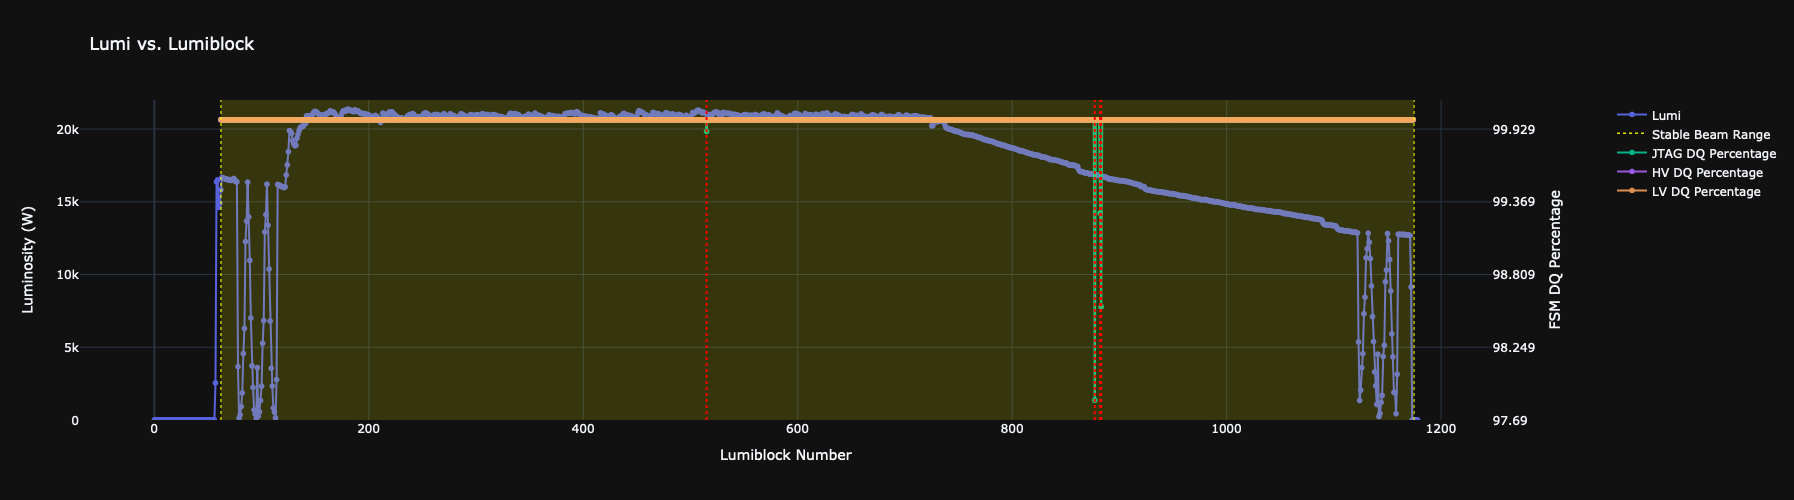

In [360]:
lumiblock_plotly_test([(lbn_lumi_df['Lumiblock Number'], lbn_lumi_df['Luminosity'], 'Lumi')], 
                 fsm_flags_df, 
                 since_dt, 
                 till_dt, 
                 'Lumi vs. Lumiblock', 
                 'Luminosity (W)', 
                 True, 
                 'Lumiblock Number', 
                 .03, 
                 [sb_lb_start], 
                 [sb_lb_end],
                 False,
                 percentages).show()

In [391]:
mdt_mrod_df = query_lib_data(to_ts(since_dt), to_ts(till_dt), '.*mdtMrod_.*.Status.*', 'MDT')
mdt_mrod_df['value'] = mdt_mrod_df['value'].astype('float64').astype(int)
mdt_mrod_df = mdt_mrod_df[(mdt_mrod_df['dt'] > since_dt) & (mdt_mrod_df['dt'] < till_dt)].reset_index(drop = True)

In [392]:
mdt_mrod_df[mdt_mrod_df['value'] > 0]

datapoint                ts  value  \
0       ATLMDTSCS:mdtMrod_EC_Tower33.Status.Busy  1726432335113000      1   
1    ATLMDTSCS:mdtMrod_EC_Tower40.Status.Removed  1726432362535000      1   
4       ATLMDTSCS:mdtMrod_EC_Tower33.Status.Busy  1726432751704000      1   
5    ATLMDTSCS:mdtMrod_EC_Tower40.Status.Removed  1726432773197000      1   
8       ATLMDTSCS:mdtMrod_EC_Tower33.Status.Busy  1726432815837000      1   
..                                           ...               ...    ...   
215      ATLMDTSCS:mdtMrod_EA_Tower8.Status.Busy  1726470950223000      1   
233     ATLMDTSCS:mdtMrod_EA_Tower24.Status.Busy  1726470950223000      1   
234     ATLMDTSCS:mdtMrod_EA_Tower25.Status.Busy  1726470950223000      1   
242     ATLMDTSCS:mdtMrod_EA_Tower32.Status.Busy  1726470950223000      1   
243     ATLMDTSCS:mdtMrod_EA_Tower33.Status.Busy  1726470950223000      1   

                                  dt  
0   2024-09-15 22:32:15.113000+02:00  
1   2024-09-15 22:32:42.535000+02:00  
4   2024-09-15 22:39:11.704000+02:00  
5   2024-09-15 22:39:33.197000+02:00  
8   2024-09-15 22:40:15.837000+02:00  
..                               ...  
215 2024-09-16 09:15:50.223000+02:00  
233 2024-09-16 09:15:50.223000+02:00  
234 2024-09-16 09:15:50.223000+02:00  
242 2024-09-16 09:15:50.223000+02:00  
243 2024-09-16 09:15:50.223000+02:00  

[72 rows x 4 columns]

In [393]:
busy_df = mdt_mrod_df[mdt_mrod_df['datapoint'].str.contains('Busy')]
removed_df = mdt_mrod_df[mdt_mrod_df['datapoint'].str.contains('Removed')]

In [394]:
def generate_tower_flag_durations_df_test(df, type, till_dt):

    flags = df[df['value'] > 0]    
    unique_datapoints = flags['datapoint'].unique()
    
    partitions = []
    towers = []
    start_dts = []
    end_dts = []
    total_times = []
    total_tower_flags = []
    
    for i in range(len(unique_datapoints)):
    
        unique_datapoint = unique_datapoints[i]
    
        tmp_df = df[df['datapoint'] == unique_datapoint]
        
        tmp_str = tmp_df['datapoint'].values[0][18:28]
    
        partition = tmp_str[:2]
    
        tower = tmp_str[-2:]
    
        tower = tower.replace('.', '')
    
        change_df = tmp_df[tmp_df['value'].diff() != 0].reset_index()
        
        if change_df.shape[0] != 1:
    
            while change_df.iloc[0]['value'] == 0:
    
                change_df.drop(index = 0, inplace = True)
    
            i = 0

            pairs = int(round(change_df.shape[0]/2-.25))
    
            for _ in range(pairs):

                tmp_start_dt = change_df.iloc[i]['dt']
                tmp_end_dt = change_df.iloc[i+1]['dt']
    
                total_time = tmp_end_dt - tmp_start_dt
    
                partitions.append(partition)
                towers.append(tower)
                start_dts.append(tmp_start_dt)
                end_dts.append(tmp_end_dt)
                total_times.append(total_time)
                total_tower_flags.append(pairs)
    
                i += 2
    
            if change_df.shape[0]%2 != 0:

                tmp_start_dt = change_df.iloc[-1]['dt']
                tmp_end_dt = till_dt
    
                total_time = tmp_end_dt - tmp_start_dt
        
                partitions.append(partition)
                towers.append(tower)
                start_dts.append(tmp_start_dt)
                end_dts.append(tmp_end_dt)
                total_times.append(total_time)
                total_tower_flags.append(pairs + 1)

    time_total = np.sum(total_times)

    return_df = pd.DataFrame({'Partition' : partitions, 
                              'Tower' : towers, 
                              'Start dt' : start_dts, 
                              'End dt' : end_dts, 
                              f'Total {type} Time' : total_times,
                              'Total Flags for Tower': total_tower_flags})
    
    return_df[f'Total {type} Time'] = return_df[f'Total {type} Time'].apply(lambda td: str(td)[7:])

    return return_df, time_total

In [395]:
busy_times_df, total_busy_time = generate_tower_flag_durations_df_test(busy_df, 'Busy', till_dt)

In [396]:
busy_times_df.head()

Partition Tower                         Start dt  \
0        EC    33 2024-09-15 22:32:15.113000+02:00   
1        EC    33 2024-09-15 22:39:11.704000+02:00   
2        EC    33 2024-09-15 22:40:15.837000+02:00   
3        EC    33 2024-09-15 22:41:01.612000+02:00   
4        EC    33 2024-09-15 22:42:02.536000+02:00   

                            End dt  Total Busy Time  Total Flags for Tower  
0 2024-09-15 22:32:45.525000+02:00  00:00:30.412000                      9  
1 2024-09-15 22:39:36.193000+02:00  00:00:24.489000                      9  
2 2024-09-15 22:40:40.334000+02:00  00:00:24.497000                      9  
3 2024-09-15 22:41:32.123000+02:00  00:00:30.511000                      9  
4 2024-09-15 22:42:27.031000+02:00  00:00:24.495000                      9

In [397]:
removed_times_df, total_removed_time = generate_tower_flag_durations_df_test(removed_df, 'Removed', till_dt)

In [398]:
removed_times_df.head()

Partition Tower                         Start dt  \
0        EC    40 2024-09-15 22:32:42.535000+02:00   
1        EC    40 2024-09-15 22:39:33.197000+02:00   
2        EC    40 2024-09-15 22:40:40.346000+02:00   
3        EC    40 2024-09-15 22:41:29.126000+02:00   
4        EC    40 2024-09-15 22:42:24.033000+02:00   

                            End dt Total Removed Time  Total Flags for Tower  
0 2024-09-15 22:39:02.585000+02:00    00:06:20.050000                      9  
1 2024-09-15 22:40:06.725000+02:00    00:00:33.528000                      9  
2 2024-09-15 22:40:55.502000+02:00    00:00:15.156000                      9  
3 2024-09-15 22:41:53.416000+02:00    00:00:24.290000                      9  
4 2024-09-15 22:42:51.334000+02:00    00:00:27.301000                      9

In [403]:
mdt_ddc_df = query_lib_data(to_ts(since_dt), to_ts(till_dt), '.*mdtDDC_.*.Status.*', 'MDT')
mdt_ddc_df['value'] = mdt_ddc_df['value'].astype(int)
mdt_ddc_df['type'] = mdt_ddc_df['datapoint'].apply(lambda x : x.split('.')[-1])
mdt_ddc_df = mdt_ddc_df[(mdt_ddc_df['dt'] > since_dt) & (mdt_ddc_df['dt'] < till_dt)].reset_index(drop = True)

In [404]:
mdt_ddc_df

datapoint                ts  \
0         ATLMDTSCS:mdtDDC_EMS3C08.Status.DroppedMezz  1726423267015000   
1     ATLMDTSCS:mdtDDC_EMS3C08.Status.DroppedMezzMask  1726423267015000   
2      ATLMDTSCS:mdtDDC_EMS3C08.Status.DroppedMezzNum  1726423267015000   
3             ATLMDTSCS:mdtDDC_EMS3C08.Status.Dropped  1726423285281000   
4         ATLMDTSCS:mdtDDC_EMS3C08.Status.DroppedMezz  1726423285281000   
...                                               ...               ...   
9236      ATLMDTSCS:mdtDDC_BOS6A16.Status.DisabledRod  1726470950738000   
9237          ATLMDTSCS:mdtDDC_BOS6A16.Status.Dropped  1726470950738000   
9238      ATLMDTSCS:mdtDDC_BOS6A16.Status.DroppedMezz  1726470950738000   
9239  ATLMDTSCS:mdtDDC_BOS6A16.Status.DroppedMezzMask  1726470950738000   
9240       ATLMDTSCS:mdtDDC_BOS6A16.Status.Pathologic  1726470950738000   

      value                               dt             type  
0         1 2024-09-15 20:01:07.015000+02:00      DroppedMezz  
1         2 2024-09-15 20:01:07.015000+02:00  DroppedMezzMask  
2         1 2024-09-15 20:01:07.015000+02:00   DroppedMezzNum  
3         1 2024-09-15 20:01:25.281000+02:00          Dropped  
4         0 2024-09-15 20:01:25.281000+02:00      DroppedMezz  
...     ...                              ...              ...  
9236      0 2024-09-16 09:15:50.738000+02:00      DisabledRod  
9237      0 2024-09-16 09:15:50.738000+02:00          Dropped  
9238      0 2024-09-16 09:15:50.738000+02:00      DroppedMezz  
9239      0 2024-09-16 09:15:50.738000+02:00  DroppedMezzMask  
9240      0 2024-09-16 09:15:50.738000+02:00       Pathologic  

[9241 rows x 5 columns]

In [407]:
condition = mdt_ddc_df['value'] > 0
dropped_df = mdt_ddc_df[condition]

pathologic_df = dropped_df[dropped_df.type == "Pathologic"].reset_index(drop=True)

In [408]:
pathologic_df

Empty DataFrame
Columns: [datapoint, ts, value, dt, type]
Index: []

In [415]:
def generate_chamber_flag_durations_df_test(df, type, till_dt):

    flags = df[df['value'] > 0]    
    unique_datapoints = flags['datapoint'].unique()
    
    chambers = []
    start_dts = []
    end_dts = []
    total_times = []
    total_chamber_flags = []
    
    for i in range(len(unique_datapoints)):
    
        unique_datapoint = unique_datapoints[i]

        # print(unique_datapoint)
    
        tmp_df = df[df['datapoint'] == unique_datapoint]

        # print(tmp_df)
        
        chamber = tmp_df['datapoint'].values[0][17:24]

        # print(tmp_str)
    
        change_df = tmp_df[tmp_df['value'].diff() != 0].reset_index()
        
        if change_df.shape[0] != 1:
    
            while change_df.iloc[0]['value'] == 0:
    
                change_df.drop(index = 0, inplace = True)
    
            i = 0

            pairs = int(round(change_df.shape[0]/2-.25))
    
            for _ in range(pairs):
    
                tmp_start_dt = change_df.iloc[i]['dt']
                tmp_end_dt = change_df.iloc[i+1]['dt']
    
                total_time = tmp_end_dt - tmp_start_dt
    
                chambers.append(chamber)
                start_dts.append(tmp_start_dt)
                end_dts.append(tmp_end_dt)
                total_times.append(total_time)
                total_chamber_flags.append(pairs)
    
                i += 2
    
            if change_df.shape[0]%2 != 0:
    
                tmp_start_dt = change_df.iloc[-1]['dt']
                tmp_end_dt = till_dt
    
                total_time = tmp_end_dt - tmp_start_dt
        
                chambers.append(chamber)
                start_dts.append(tmp_start_dt)
                end_dts.append(tmp_end_dt)
                total_times.append(total_time)
                total_chamber_flags.append(pairs + 1)

    time_total = np.sum(total_times)

    return_df = pd.DataFrame({'Chamber' : chambers, 
                              'Start dt' : start_dts, 
                              'End dt' : end_dts, 
                              f'Total {type} Time' : total_times,
                              'Total Flags for Chamber': total_chamber_flags})
    
    return_df[f'Total {type} Time'] = return_df[f'Total {type} Time'].apply(lambda td: str(td)[7:])

    return return_df, time_total

In [416]:
autorecovery_df = mdt_ddc_df[mdt_ddc_df['type'] == "Recovering"].reset_index(drop=True)
autorecovery_times_df, total_autorecover_time = generate_chamber_flag_durations_df_test(autorecovery_df, 'Recovery', till_dt)

In [417]:
autorecovery_times_df.head()

Chamber                         Start dt                           End dt  \
0  EMS3C08 2024-09-15 20:01:31.009000+02:00 2024-09-15 20:01:35.729000+02:00   
1  BEE1A02 2024-09-15 20:25:24.734000+02:00 2024-09-15 20:25:27.947000+02:00   
2  EMS1A02 2024-09-15 22:37:29.915000+02:00 2024-09-15 22:37:31.924000+02:00   
3  EOL1A05 2024-09-15 22:48:32.698000+02:00 2024-09-15 22:48:35.910000+02:00   
4  EES1C02 2024-09-15 23:08:25.994000+02:00 2024-09-15 23:08:28.603000+02:00   

  Total Recovery Time  Total Flags for Chamber  
0     00:00:04.720000                        1  
1     00:00:03.213000                        1  
2     00:00:02.009000                        1  
3     00:00:03.212000                        1  
4     00:00:02.609000                        1

In [418]:
dropChamber_df = mdt_ddc_df[mdt_ddc_df.type == "Dropped"].reset_index(drop=True)

dropChamber_times_df, total_dropped_time = generate_chamber_flag_durations_df_test(dropChamber_df, 'Drop', till_dt)

In [420]:
dropChamber_times_df.head()

Chamber                         Start dt                           End dt  \
0  EMS3C08 2024-09-15 20:01:25.281000+02:00 2024-09-15 20:01:31.009000+02:00   
1  BEE1A02 2024-09-15 20:25:24.177000+02:00 2024-09-15 20:25:24.734000+02:00   
2  EMS1C02 2024-09-15 22:32:42.535000+02:00 2024-09-15 22:39:02.585000+02:00   
3  EMS1C02 2024-09-15 22:39:33.197000+02:00 2024-09-15 22:40:06.725000+02:00   
4  EMS1C02 2024-09-15 22:40:40.346000+02:00 2024-09-15 22:40:55.502000+02:00   

   Total Drop Time  Total Flags for Chamber  
0  00:00:05.728000                        1  
1  00:00:00.557000                        1  
2  00:06:20.050000                        9  
3  00:00:33.528000                        9  
4  00:00:15.156000                        9

In [421]:
dropMezz_df = mdt_ddc_df[mdt_ddc_df['type'] == "DroppedMezz"].reset_index(drop=True)
dropMezz_df.sort_values(by='ts', inplace = True)
dropMezzNum_df = mdt_ddc_df[mdt_ddc_df['type'] == "DroppedMezzNum"].reset_index(drop=True)
dropMezzNum_df.sort_values(by='ts', inplace = True)
dropMezzMask_df = mdt_ddc_df[mdt_ddc_df['type'] == "DroppedMezzMask"].reset_index(drop=True)
dropMezzMask_df.sort_values(by='ts', inplace = True)

In [422]:
def generate_mezz_flag_durations_df_test(df, dropMezzNum_df, dropMezzMask_df, till_dt):

    flags = df[df['value'] > 0]    
    unique_datapoints = flags['datapoint'].unique()
    
    chambers = []
    DroppedMezzNums = []
    DroppedMezzMasks = []
    start_dts = []
    end_dts = []
    total_times = []
    total_mezz_flags = []
    
    for i in range(len(unique_datapoints)):
    
        unique_datapoint = unique_datapoints[i]

        # print(unique_datapoint)
    
        tmp_df = df[df['datapoint'] == unique_datapoint]

        # print(tmp_df)
        
        chamber = tmp_df['datapoint'].values[0][17:24]
    
        change_df = tmp_df[tmp_df['value'].diff() != 0].reset_index()
        
        if change_df.shape[0] != 1:
    
            while change_df.iloc[0]['value'] == 0:
    
                change_df.drop(index = 0, inplace = True)
    
            j = 0

            pairs = int(round(change_df.shape[0]/2-.25))
    
            for _ in range(pairs):
    
                tmp_start_dt = change_df.iloc[j]['dt']
                tmp_end_dt = change_df.iloc[j+1]['dt']
    
                total_time = tmp_end_dt - tmp_start_dt

                try:
                    
                    DroppedMezzNum = dropMezzNum_df.iloc[i]['value']

                except IndexError:

                    DroppedMezzNum = 'Not Available'

                try:
                    
                    DroppedMezzMask = hex(dropMezzMask_df.iloc[i]['value'])[2:]

                except IndexError:

                    DroppedMezzMask = 'Not Available'

                chambers.append(chamber)
                DroppedMezzNums.append(DroppedMezzNum)
                DroppedMezzMasks.append(DroppedMezzMask)
                start_dts.append(tmp_start_dt)
                end_dts.append(tmp_end_dt)
                total_times.append(total_time)
                total_mezz_flags.append(pairs)
    
                j += 2
    
            if change_df.shape[0]%2 != 0:
    
                tmp_start_dt = change_df.iloc[-1]['dt']
                tmp_end_dt = till_dt
    
                total_time = tmp_end_dt - tmp_start_dt
        
                try:
                    
                    DroppedMezzNum = dropMezzNum_df.iloc[i]['value']

                except IndexError:

                    DroppedMezzNum = 'Not Available'

                try:
                    
                    DroppedMezzMask = hex(dropMezzMask_df.iloc[i]['value'])[2:]

                except IndexError:

                    DroppedMezzMask = 'Not Available'
    
                chambers.append(chamber)
                DroppedMezzNums.append(DroppedMezzNum)
                DroppedMezzMasks.append(DroppedMezzMask)
                start_dts.append(tmp_start_dt)
                end_dts.append(tmp_end_dt)
                total_times.append(total_time)
                total_mezz_flags.append(pairs + 1)

    time_total = np.sum(total_times)

    return_df = pd.DataFrame({'Chamber' : chambers, 
                              'Mezz Number' : DroppedMezzNums,
                              'Mezz Mask' : DroppedMezzMasks, 
                              'Start dt' : start_dts, 
                              'End dt' : end_dts, 
                              'Total Drop Time' : total_times,
                              'Total Flags For Mezz': total_mezz_flags})
    
    return_df['Total Drop Time'] = return_df['Total Drop Time'].apply(lambda td: str(td)[7:])

    return return_df, time_total

In [423]:
dropMezz_times_df, total_dropMezz_time = generate_mezz_flag_durations_df_test(dropMezz_df, dropMezzNum_df, dropMezzMask_df, till_dt)

In [425]:
dropMezz_times_df.head()

Chamber  Mezz Number Mezz Mask                         Start dt  \
0  EMS3C08            1         2 2024-09-15 20:01:07.015000+02:00   
1  BEE1A02            1         0 2024-09-15 20:25:02.874000+02:00   
2  EMS1A02            1       100 2024-09-15 22:37:06.617000+02:00   
3  EOL1A05            1         0 2024-09-15 22:48:06.916000+02:00   
4  EES1C02            1        80 2024-09-15 23:08:02.556000+02:00   

                            End dt  Total Drop Time  Total Flags For Mezz  
0 2024-09-15 20:01:25.281000+02:00  00:00:18.266000                     1  
1 2024-09-15 20:25:24.177000+02:00  00:00:21.303000                     1  
2 2024-09-15 22:37:24.911000+02:00  00:00:18.294000                     1  
3 2024-09-15 22:48:31.325000+02:00  00:00:24.409000                     1  
4 2024-09-15 23:08:23.914000+02:00  00:00:21.358000                     1

In [426]:
pbeast_mapping_df = pd.read_csv('Pbeast_mapping.csv').drop(columns = 'Unnamed: 0')

In [427]:
mdt_unplugged_df = query_lib_data(to_ts(since_dt), to_ts(till_dt), '.*unplugged', 'MDT')
mdt_unplugged_df['value'] = mdt_unplugged_df['value'].astype(int)
mdt_unplugged_df = mdt_unplugged_df[(mdt_unplugged_df['dt'] > since_dt) & (mdt_unplugged_df['dt'] < till_dt)].reset_index(drop = True)

In [429]:
mdt_unplugged_df.head()

datapoint                ts  value  \
0  ATLMDTPS3:CAEN/PSMDT01/branchController11/easy...  1726418533495000      0   
1  ATLMDTPS3:CAEN/PSMDT01/branchController11/easy...  1726418533495000      0   
2  ATLMDTPS3:CAEN/PSMDT01/branchController11/easy...  1726418533495000      0   
3  ATLMDTPS3:CAEN/PSMDT01/branchController11/easy...  1726418533495000      0   
4  ATLMDTPS3:CAEN/PSMDT01/branchController11/easy...  1726418533495000      0   

                                dt  
0 2024-09-15 18:42:13.495000+02:00  
1 2024-09-15 18:42:13.495000+02:00  
2 2024-09-15 18:42:13.495000+02:00  
3 2024-09-15 18:42:13.495000+02:00  
4 2024-09-15 18:42:13.495000+02:00

In [436]:
def generate_unplugged_flag_durations_df_test(df, pbeast_mapping_df):
    
    flags = df[df['value'] > 0]    
    unique_datapoints = flags['datapoint'].unique()
    unplugged_mapping = pbeast_mapping_df[pbeast_mapping_df['comment_'].str.contains('.* Unplugged')]
    
    chambers = []
    layers = []
    start_dts = []
    end_dts = []
    total_times = []
    total_chamber_flags = []
    
    for i in range(len(unique_datapoints)):
    
        unique_datapoint = unique_datapoints[i]
    
        tmp_df = df[df['datapoint'] == unique_datapoint]

        channel_mapping = unplugged_mapping[unplugged_mapping['element_name'].str.contains(tmp_df.iloc[0]['datapoint'])]['comment_']
                
        partition = channel_mapping.values[0][7:9]
        chamber = channel_mapping.values[0][10:-17]
        layer = channel_mapping.values[0][18:21]
        
        change_df = tmp_df[tmp_df['value'].diff() != 0].reset_index()
        
        if change_df.shape[0] != 1:
    
            while change_df.iloc[0]['value'] == 0:
    
                change_df.drop(index = 0, inplace = True)
    
            i = 0

            pairs = int(round(change_df.shape[0]/2-.25))
    
            for _ in range(pairs):

                tmp_start_dt = change_df.iloc[i]['dt']
                tmp_end_dt = change_df.iloc[i+1]['dt']
    
                total_time = tmp_end_dt - tmp_start_dt
    
                chambers.append(chamber)
                layers.append(layer)
                start_dts.append(tmp_start_dt)
                end_dts.append(tmp_end_dt)
                total_times.append(total_time)
                total_chamber_flags.append(pairs)
    
                i += 2
    
            if change_df.shape[0]%2 != 0:
    
                tmp_start_dt = change_df.iloc[-1]['dt']
                tmp_end_dt = till_dt
    
                total_time = tmp_end_dt - tmp_start_dt
        
                chambers.append(chamber)
                layers.append(layer)
                start_dts.append(tmp_start_dt)
                end_dts.append(tmp_end_dt)
                total_times.append(total_time)
                total_chamber_flags.append(pairs + 1)

    time_total = np.sum(total_times)

    return_df = pd.DataFrame({'Chamber' : chambers,
                              'Layer' : layers,
                              'Start dt' : start_dts, 
                              'End dt' : end_dts, 
                              'Total unplugged time' : total_times,
                              'Total Flags for Chamber': total_chamber_flags})
    
    return_df['Total unplugged time'] = return_df['Total unplugged time'].apply(lambda td: str(td)[7:])

    return return_df, time_total

In [437]:
unplugged_times_df, total_unplugged_time = generate_unplugged_flag_durations_df_test(mdt_unplugged_df, pbeast_mapping_df)

In [438]:
unplugged_times_df

Empty DataFrame
Columns: [Chamber, Layer, Start dt, End dt, Total unplugged time, Total Flags for Chamber]
Index: []